In [1]:
from trainer import *
from matplotlib import pyplot as plt
%matplotlib inline

# Environment

In [2]:
env_name = 'CliffWalking-v0'

if env_name == 'CliffWalking-v0':
    env = gym.make(env_name)
    env_grid_shape =(4, 12) 
elif env_name == 'Taxi-v2':
    env = gym.make(env_name)
    env_grid_shape = (25,20)
elif env_name == 'GridWorld':
    env_grid_shape = (8,8)
    env = GridworldEnv(env_grid_shape)


# Agents

In [3]:
num_episodes = 2000
discount_factor = 1.0
alpha = 0.1
epsilon = 0.001

smoothing_window_size = 100

### Policy

In [4]:
policy = 'e-greedy' # can use 'e-greedy', 'greedy', 'random'

## Sarsa

START TRAINING - Sarsa Agent (e-greedy)
Episode 2000/2000 || Best average reward -13.0
END TRAINING - Sarsa Agent (e-greedy)


C:\Users\Mawjee\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


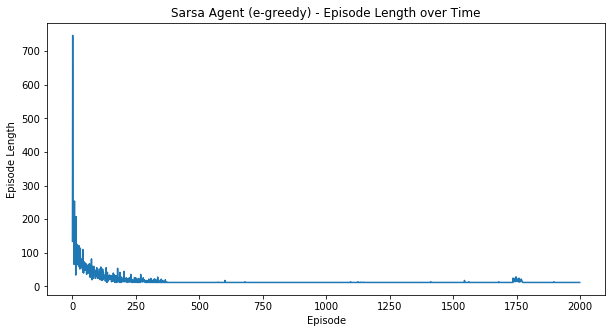

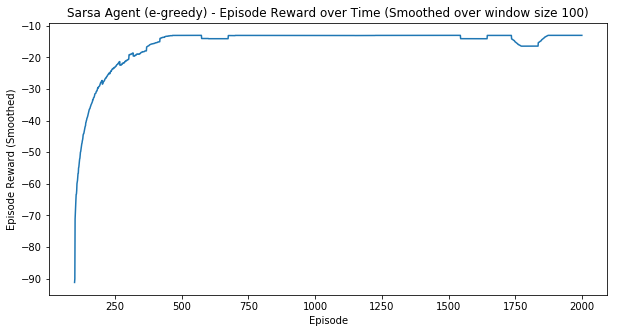

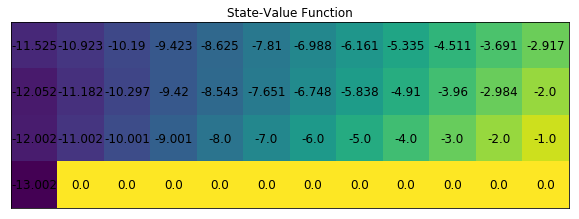

In [5]:
sarsa_agent = Sarsa(env.action_space.n, policy, alpha, discount_factor, epsilon)
sarsa_agent_training_stats = train(env, sarsa_agent, num_episodes)
plot_episode_stats(sarsa_agent.get_name(), sarsa_agent_training_stats[0], sarsa_agent_training_stats[1], smoothing_window_size)
plot_values(env_grid_shape, sarsa_agent.Q)

## Q Learning (SarsaMax)

START TRAINING - Q Learning Agent (e-greedy)
Episode 2000/2000 || Best average reward -13.0
END TRAINING - Q Learning Agent (e-greedy)


C:\Users\Mawjee\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


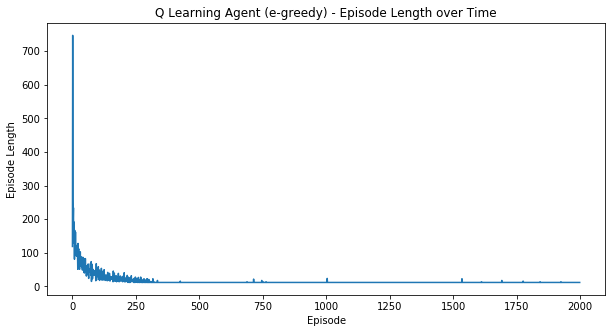

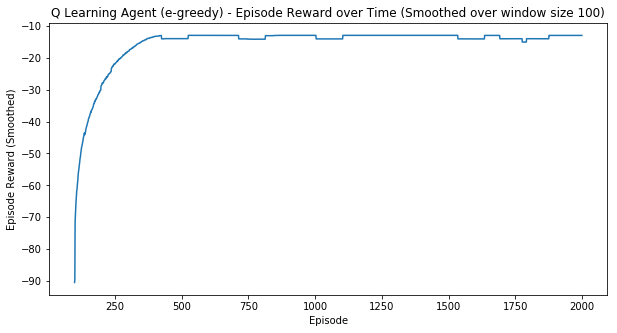

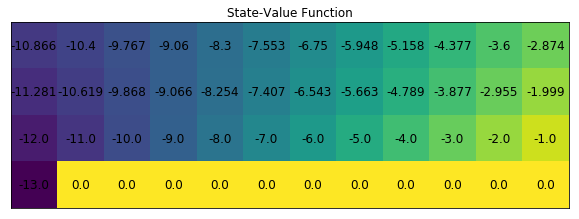

In [6]:
q_learning_agent = QLearning(env.action_space.n, policy, alpha, discount_factor, epsilon)
q_learning_agent_training_stats = train(env, q_learning_agent, num_episodes)
plot_episode_stats(q_learning_agent.get_name(), q_learning_agent_training_stats[0], q_learning_agent_training_stats[1], smoothing_window_size)
plot_values(env_grid_shape, q_learning_agent.Q)

## Expected Sarsa

START TRAINING - Expected Sarsa Agent (e-greedy)
Episode 2000/2000 || Best average reward -13.0
END TRAINING - Expected Sarsa Agent (e-greedy)


C:\Users\Mawjee\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


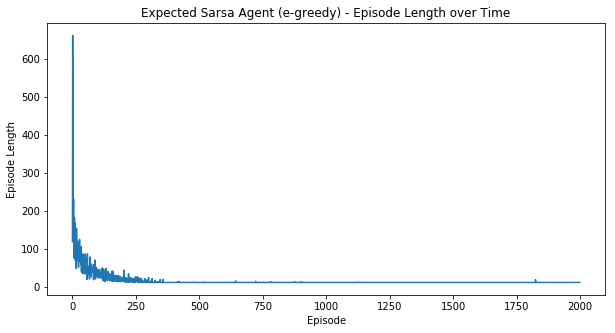

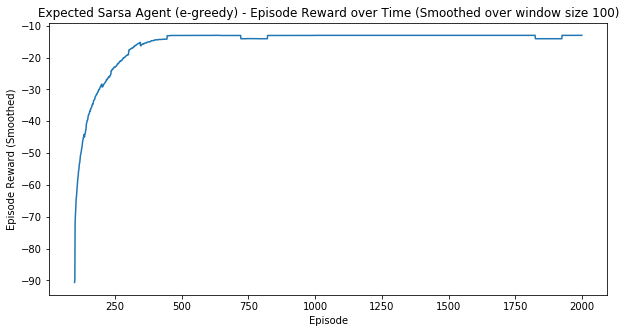

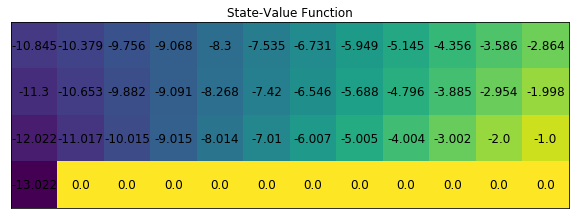

In [7]:
expected_sarsa_agent = ExpectedSarsa(env.action_space.n, policy, alpha, discount_factor, epsilon)
expected_sarsa_agent_training_stats = train(env, expected_sarsa_agent, num_episodes)
plot_episode_stats(expected_sarsa_agent.get_name(), expected_sarsa_agent_training_stats[0], expected_sarsa_agent_training_stats[1], smoothing_window_size)
plot_values(env_grid_shape, expected_sarsa_agent.Q)

## Compare

In [8]:
start= 1
end = num_episodes

data = [[],[],[]]
data[0] = [sarsa_agent.get_name(), q_learning_agent.get_name(), expected_sarsa_agent.get_name()]
data[1] = [sarsa_agent_training_stats[0][start:end], q_learning_agent_training_stats[0][start:end], expected_sarsa_agent_training_stats[0][start:end]]
data[2] = [sarsa_agent_training_stats[1][start:end], q_learning_agent_training_stats[1][start:end], expected_sarsa_agent_training_stats[1][start:end]]

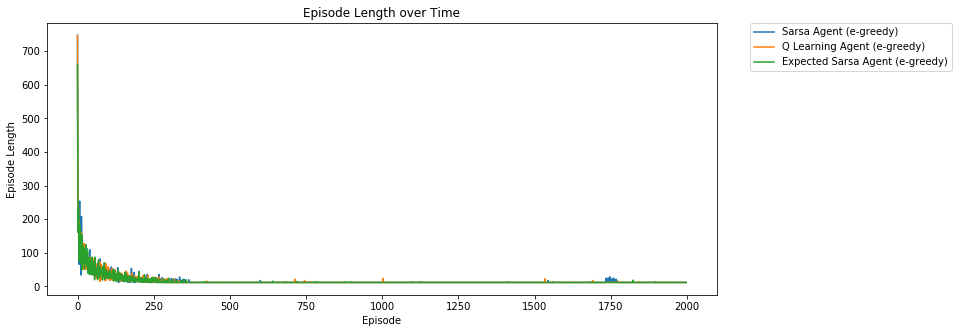

In [9]:
fig1 = plt.figure(figsize=(12, 5))
plt.plot(data[1][0], label=data[0][0])
plt.plot(data[1][1], label=data[0][1])
plt.plot(data[1][2], label=data[0][2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.title("Episode Length over Time")

plt.show()

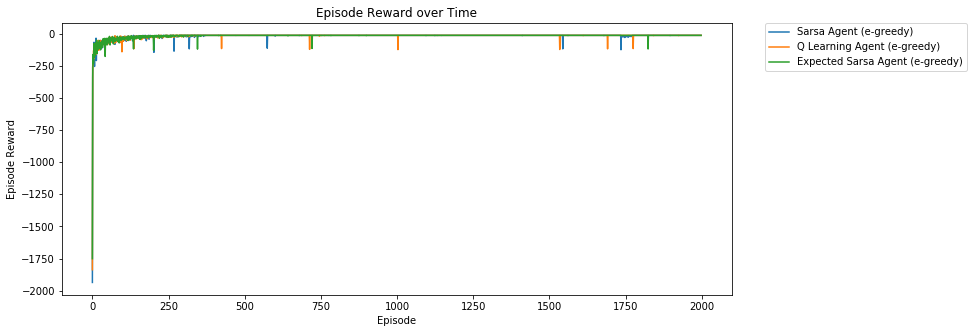

In [10]:
fig2 = plt.figure(figsize=(12, 5))
plt.plot(data[2][0], label=data[0][0])
plt.plot(data[2][1], label=data[0][1])
plt.plot(data[2][2], label=data[0][2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Episode Reward over Time")

plt.show()